<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd
import datetime #Convert to unix time
import time #Convert to unix time

import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

# Part 1

## Using Random Forest Classifier:

- Checking the importance of hyperparameters - 'n_estimators' and 'max_depth'.
- Hyperparameter tuning to find the best hyperparameter.
- Fitting the best model.
- Calculating F1 score.
- Plotting Confusion matrix.
- Plotting ROC AUC curve.
- Plotting Feature Importances.

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

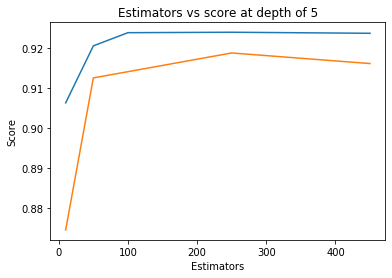

In [6]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


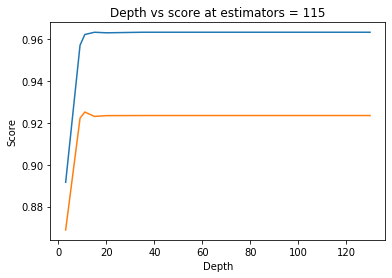

In [7]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at estimators = 115')
plt.show()

In [8]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96325676 0.96300461 0.9608082  0.96283751 0.96395433]
mean train scores [0.96396452 0.96360099 0.9611218  0.9637227  0.96535553]


In [9]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [10]:
#copy pasting the above output
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [11]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [12]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


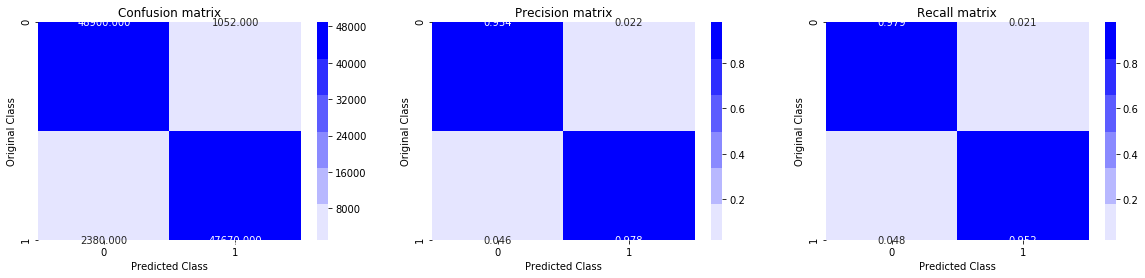

Test confusion_matrix


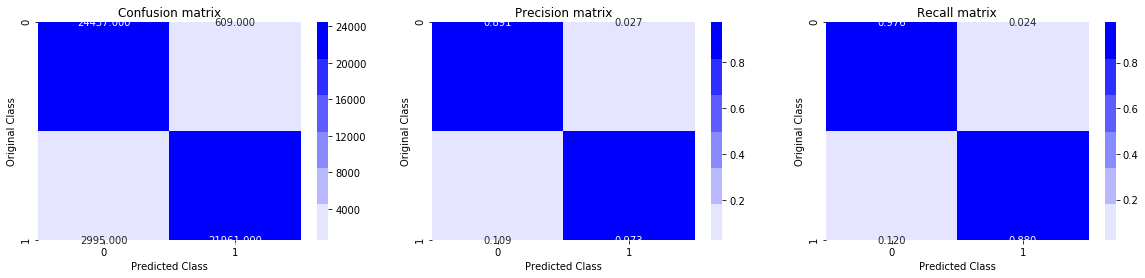

In [14]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

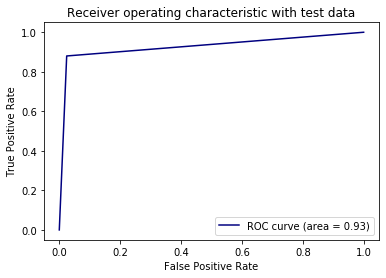

In [15]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

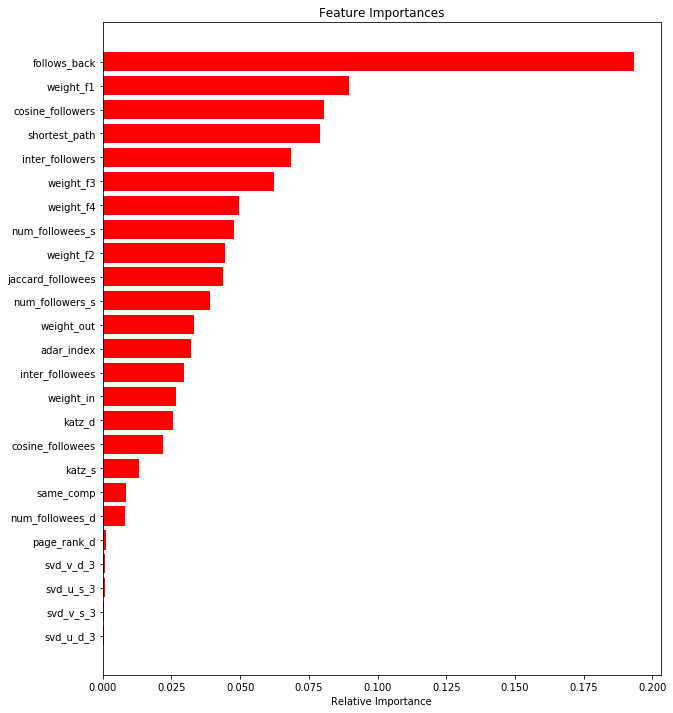

In [16]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Part 2

## Adding two new features:

- Preferential Attachment: for both followers and followees. For more information, lease check this link: http://be.amazd.com/link-prediction/
- svd_dot: Dot product between sourse node svd and destination node svd features. For more information, lease check this link: https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf

In [6]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0,0.000000,0.000000,0.000000,11,6,15,8,0,0,...,1.983697e-06,1.545067e-13,-8.108201e-13,1.719702e-14,1.355342e-12,4.675199e-13,1.128581e-06,6.616417e-14,-9.770656e-13,4.159743e-14
1,0,0.058824,0.039528,0.111803,10,8,10,8,1,1,...,3.041610e-09,1.313737e-11,-2.595389e-10,1.770968e-14,2.786193e-13,6.862396e-15,3.891567e-11,1.423119e-14,-1.053545e-13,9.583132e-17
2,0,0.000000,0.000000,0.000000,6,21,5,23,0,0,...,9.024887e-11,1.063324e-11,-1.193671e-11,6.045834e-14,6.772071e-12,2.289562e-11,9.896493e-10,7.242230e-10,-3.013788e-10,1.826297e-10
3,0,0.000000,0.000000,0.000000,1,14,2,8,0,0,...,1.816122e-14,7.172952e-17,-4.770549e-16,1.392243e-18,1.634155e-12,3.561516e-11,5.396735e-11,2.606701e-12,-3.202129e-10,3.880372e-14
4,0,0.000000,0.000000,0.000000,28,19,25,18,0,0,...,2.244992e-09,6.555567e-12,-2.992556e-10,5.827170e-14,8.942687e-10,2.260146e-10,4.296740e-10,4.127718e-12,-1.941483e-11,1.162157e-13


In [6]:
df_final_train['pref_attach_follower'] = df_final_train['num_followers_s'] * df_final_train['num_followers_d']
df_final_train['pref_attach_followee'] = df_final_train['num_followees_s'] * df_final_train['num_followees_d']

#================================================================================================================

df_final_test['pref_attach_follower'] = df_final_test['num_followers_s'] * df_final_test['num_followers_d']
df_final_test['pref_attach_followee'] = df_final_test['num_followees_s'] * df_final_test['num_followees_d']

In [7]:
df_final_train['svd_dot_u'] = df_final_train['svd_u_s_1']*df_final_train['svd_u_d_1'] + \
                            df_final_train['svd_u_s_2']*df_final_train['svd_u_d_2'] + \
                            df_final_train['svd_u_s_3']*df_final_train['svd_u_d_3'] + \
                            df_final_train['svd_u_s_4']*df_final_train['svd_u_d_4'] + \
                            df_final_train['svd_u_s_5']*df_final_train['svd_u_d_5'] + \
                            df_final_train['svd_u_s_6']*df_final_train['svd_u_d_6'] 

df_final_train['svd_dot_v'] = df_final_train['svd_v_s_1']*df_final_train['svd_v_d_1'] + \
                            df_final_train['svd_v_s_2']*df_final_train['svd_v_d_2'] + \
                            df_final_train['svd_v_s_3']*df_final_train['svd_v_d_3'] + \
                            df_final_train['svd_v_s_4']*df_final_train['svd_v_d_4'] + \
                            df_final_train['svd_v_s_5']*df_final_train['svd_v_d_5'] + \
                            df_final_train['svd_v_s_6']*df_final_train['svd_v_d_6']

#================================================================================================================

df_final_test['svd_dot_u'] = df_final_test['svd_u_s_1']*df_final_test['svd_u_d_1'] + \
                            df_final_test['svd_u_s_2']*df_final_test['svd_u_d_2'] + \
                            df_final_test['svd_u_s_3']*df_final_test['svd_u_d_3'] + \
                            df_final_test['svd_u_s_4']*df_final_test['svd_u_d_4'] + \
                            df_final_test['svd_u_s_5']*df_final_test['svd_u_d_5'] + \
                            df_final_test['svd_u_s_6']*df_final_test['svd_u_d_6']

df_final_test['svd_dot_v'] = df_final_test['svd_v_s_1']*df_final_test['svd_v_d_1'] + \
                            df_final_test['svd_v_s_2']*df_final_test['svd_v_d_2'] + \
                            df_final_test['svd_v_s_3']*df_final_test['svd_v_d_3'] + \
                            df_final_test['svd_v_s_4']*df_final_test['svd_v_d_4'] + \
                            df_final_test['svd_v_s_5']*df_final_test['svd_v_d_5'] + \
                            df_final_test['svd_v_s_6']*df_final_test['svd_v_d_6']

In [8]:
df_final_train.columns

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'pref_attach_follower', 'pref_attach_followee', 'svd_dot_u',
       'svd_dot_v'],
      dtype='object')

# Using XGBoost Classifier:

Step by step procedure of Part 2 is explained below (at the end).

In [9]:
from xgboost import XGBClassifier
import xgboost as xgb

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "eta": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}

clf = XGBClassifier(objective='binary:logistic', random_state=25, n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.98290727 0.9825915  0.98318703 0.97324106 0.97355459]
mean train scores [1.         1.         1.         0.98403003 0.98232037]


In [11]:
print(rf_random.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=109, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=25, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [12]:
#copy pasting the above output
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=109, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=25, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [14]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 1.0
Test f1 score 0.9252139929058432


Train confusion_matrix


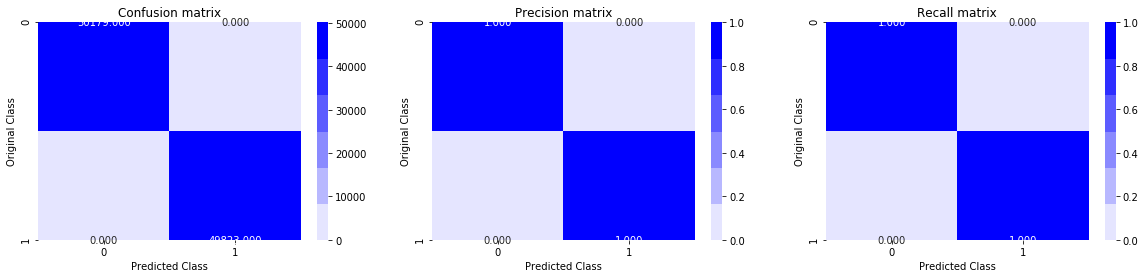

Test confusion_matrix


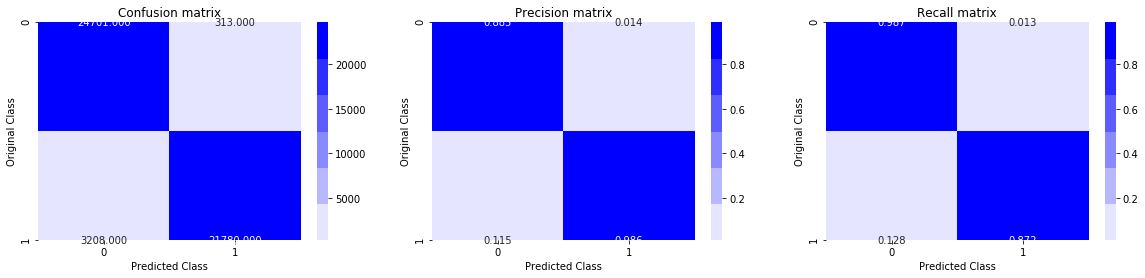

In [17]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

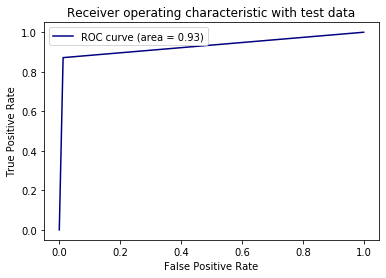

In [18]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

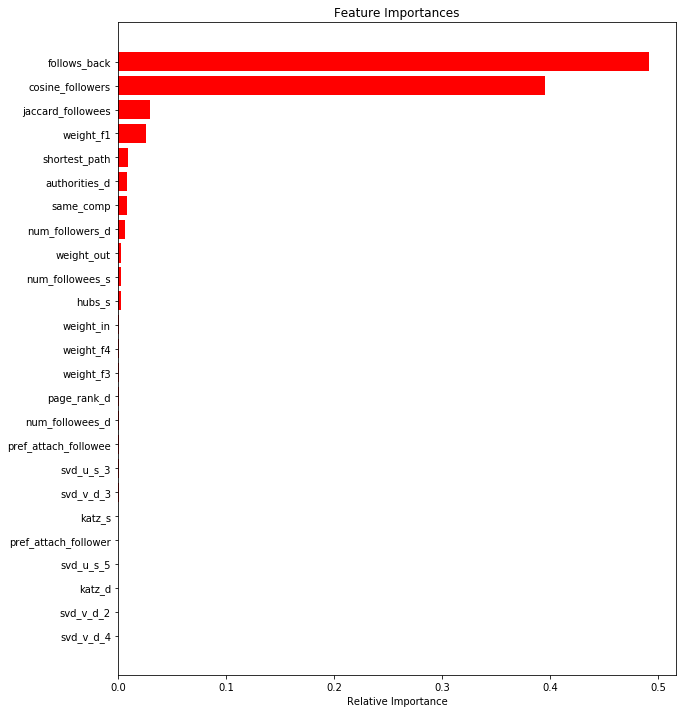

In [19]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Step by step procedure:**
* Created preferential attachment feature by multiplying number of followers of source node and destination node.
* Did the same for followees.
* Created svd_dot_u feature by taking dot product of source SVD U vector (6x1) with destination SVD U vector (6x1).
* Created svd_dot_v feature by taking dot product of source SVD V.T vector (6x1) with destination SVD V.T vector (6x1).
* Trained an XGBoost Classifier using RandomizedSearchCV for hyperparameter tuning.
* Used the best estimator to train the training data.
* Calculated the F1 scores on train and test data.
* Plotted the confusion, precision, and recall matrix.
* Plotted the ROC curve, and calculated the AUC score.
* Plotted the bar plot for feature importance.

**Observation:**
* There's significant improvement in Train F1 score and a slight improvement in the Test F1 score.
* Since the Test F1 score is 1.0, the model is probably getting overfit.
* The feature importance for 'follows_back' and 'cosine_followers' has increased significantly.